# ***Installing Package***

In [87]:
#we first import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split




# ***Uploading the data set***

In [88]:
#we now download and uplaod the data set

ds_egssd = pd.read_csv('/content/drive/MyDrive/ML Project.csv')



# ***Viewing and Analysing the Data set***

In [89]:
#Viewing data
#now we can print the head and tails (first and last five)of the data sets
ds_egssd.head()
ds_egssd.tail()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


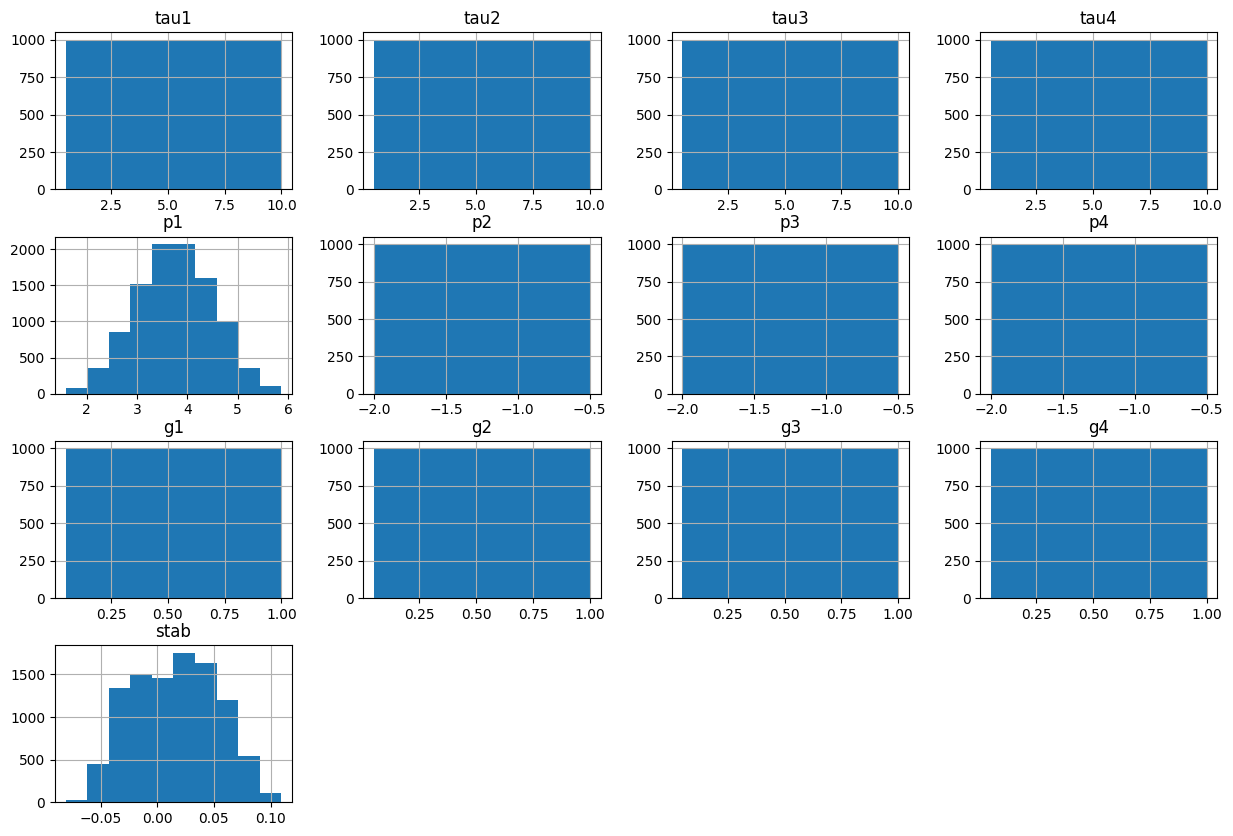

In [90]:
#These are the information of the given data set
ds_egssd.info()
ds_egssd.describe()
ds_egssd.hist(bins=10, figsize=(15,10))
plt.show()

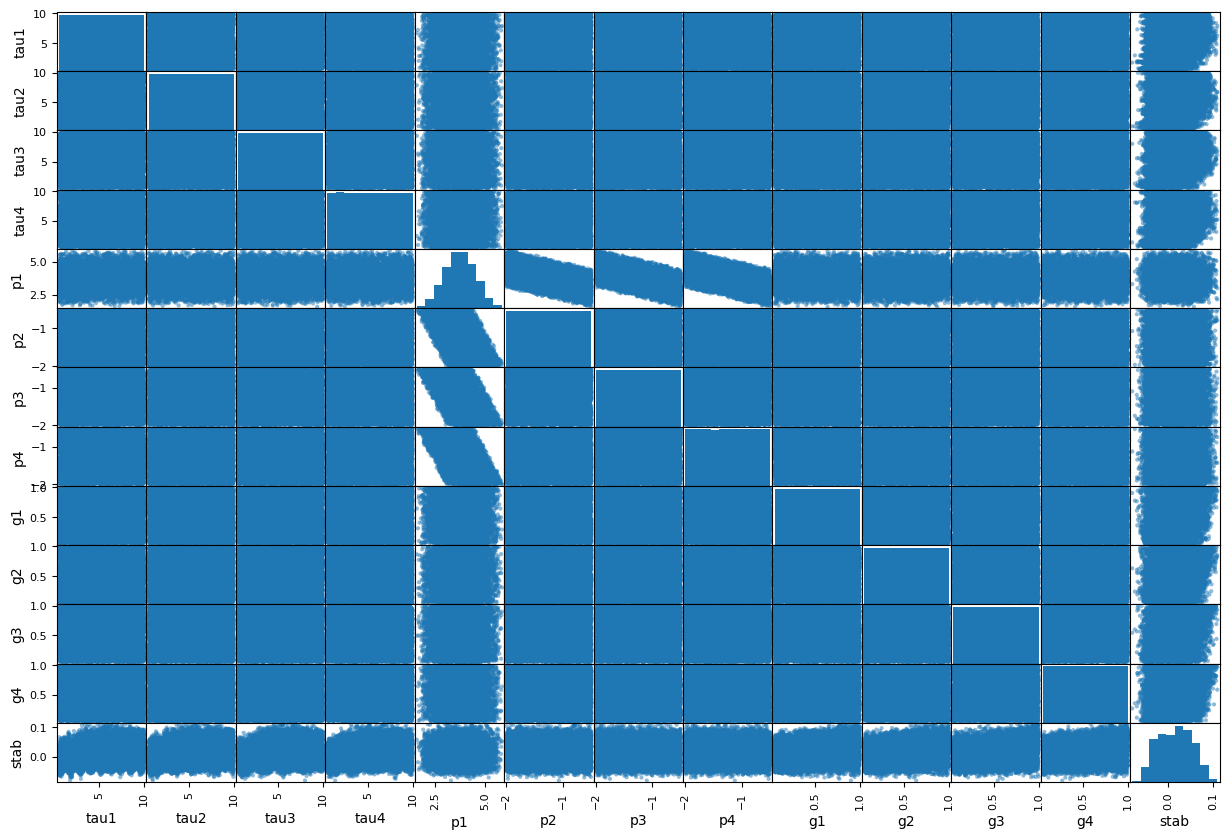

In [91]:
#since there are no namless values or missing values
#lets us start by visualising the data
pd.plotting.scatter_matrix(ds_egssd, figsize=(15, 10))
plt.show()

# ***Giving values for x and y variables***

In [92]:
#Giving values for the x set
x=ds_egssd.drop(columns=["stab","stabf"])
x.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [93]:
#Now we assign values for y (we first conver the strings in stabf to numbers and then assign value of y)
#one error i personally made is added multiples col to the table named: num, new_AS and stabf but all contain the same information
#the new col that has the string convereted to numbers is called 'num'

le=LabelEncoder()
ds_egssd['num']=le.fit_transform(ds_egssd['stabf'])
#print(ds_egssd['num'])

ds_egssd['stabf']=ds_egssd['num']
#print(ds_egssd['num'])


#ds_egssd.info()

#Value of y

y=ds_egssd['num']
y.head()



0    1
1    0
2    1
3    1
4    1
Name: num, dtype: int64

# ***Splitting Traning and Testing sets***

In [94]:
# We now split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state=42)

In [95]:
#Printing values of x train and y train
x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)


x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
print(x_train)
print(y_train)
print(type(y_train))

          tau1      tau2      tau3      tau4        p1        p2        p3  \
1249  3.507015  7.153356  4.613492  4.316704  3.805283 -1.843323 -0.769643   
8936  4.382909  9.456287  0.796901  3.470452  4.253830 -1.636117 -1.681423   
4604  5.735298  2.742411  2.265467  0.609000  3.917089 -1.348753 -1.395325   
3168  8.804876  3.358790  4.648564  9.534413  4.626540 -1.982996 -1.594497   
4463  9.632859  0.878894  6.916970  5.203109  3.068386 -1.297168 -1.112700   
...        ...       ...       ...       ...       ...       ...       ...   
4145  3.611261  2.823969  6.443583  5.580119  5.415726 -1.691441 -1.771056   
8301  5.885405  9.989265  8.790848  2.001724  3.995171 -1.952787 -1.468542   
2881  4.760597  2.968432  2.379881  4.834267  3.551370 -0.614905 -1.270966   
7655  3.137950  1.954118  3.652218  1.428319  4.200709 -1.020833 -1.633180   
5181  9.225039  9.204239  5.931763  0.589579  2.629912 -1.131719 -0.993128   

            p4        g1        g2        g3        g4  
1249 -

# ***Logistic Regression***

In [96]:
#Start using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_class=LogisticRegression()
lr_class.fit(x_train,y_train)


LogisticRegression()

In [97]:
#Standardizing the data for Logistic regression and SVM
from sklearn.preprocessing import StandardScaler

std_sc=StandardScaler()
std_sc.fit(x_train)

x_train_sc=std_sc.fit_transform(x_train)
x_test_sc=std_sc.fit_transform(x_test)

In [98]:
#We use the LR fucntion and fit the model and train it to predict values

lr_class=LogisticRegression(multi_class='multinomial')
lr_class.fit(x_train_sc,y_train)
pred_lr=lr_class.predict(x_test_sc)
print("The predicted values : ",pred_lr)

The predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [99]:
lr_accu=lr_class.score(x_test_sc,y_test)
print("The Accuray of Logistic regression :" ,lr_accu)

The Accuray of Logistic regression : 0.8168


In [100]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Logistic Regression: %.3f' %precision_score(y_true=y_test,y_pred=pred_lr))
print('Recall score for Logistic Regression : %.3f' %recall_score(y_true=y_test,y_pred=pred_lr))
print('F1 Score for Logistic Regression  : %.3f' %f1_score(y_true=y_test,y_pred=pred_lr))
f1_1=(f1_score(y_true=y_test,y_pred=pred_lr)).round(3)



Precision score for Logistic Regression: 0.839
Recall score for Logistic Regression : 0.882
F1 Score for Logistic Regression  : 0.860


 Report for  LogisticRegression(multi_class='multinomial'):
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       905
           1       0.84      0.88      0.86      1595

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.81      0.82      0.81      2500




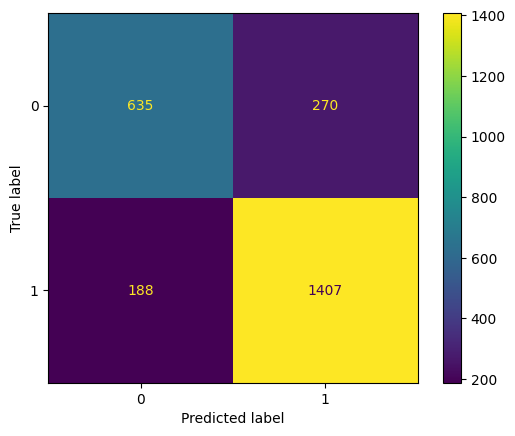

In [101]:
#confusion matric for logistic regression
from sklearn import datasets, svm , metrics

lr_class=LogisticRegression(multi_class='multinomial')
lr_class.fit(x_train_sc,y_train)
pred_lr=lr_class.predict(x_test_sc)
print(" Report for  %s:\n%s\n"
      % (lr_class, metrics.classification_report(y_test, pred_lr)))
cofmat=confusion_matrix(y_true= y_test, y_pred=pred_lr)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

# ***SVM -Support Vector Machine***

In [102]:
#SVM -support vectore machine
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm , metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

s_c=StandardScaler()
s_c.fit(x_train)
train_size=x.astype(np.float64)
train_test_split=train_test_split(ds_egssd,test_size=0.25,random_state=1)



# ***SVM - rbf***

In [103]:
#SVM using kernel: RBF
classi = SVC(kernel='rbf', random_state=1, C=1, gamma='auto')

classi.fit(x_train_sc, y_train)  # Train the model

SVC(C=1, gamma='auto', random_state=1)

In [104]:
#now lets is perform predicition
y_ans=classi.predict(x_train_sc)
print("Predicted values :",y_ans)

# predicted an ans in x_test
y_ans=classi.predict(x_test_sc)
print("Predicted values :",y_ans)

Predicted values : [1. 0. 0. ... 0. 1. 1.]
Predicted values : [1. 1. 1. ... 1. 1. 1.]


In [105]:
from sklearn import datasets, svm , metrics
#The score of accuracy of model
print("The Accuray of SVM RBF model : ",classi.score(x_test_sc,y_test))



The Accuray of SVM RBF model :  0.9564


 Report for RBF SVC():
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       905
           1       0.96      0.97      0.97      1595

    accuracy                           0.96      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.96      0.96      0.96      2500




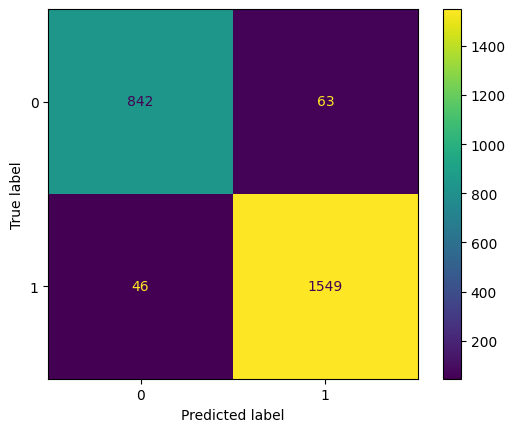

In [106]:
#confusion matrix for RBF
from sklearn.metrics import ConfusionMatrixDisplay

kernerlsvm=SVC(kernel='rbf')
kernerlsvm.fit(x_train_sc ,y_train)

prediction=kernerlsvm.predict(x_test_sc)
print(" Report for RBF %s:\n%s\n"
      % (kernerlsvm, metrics.classification_report(y_test, prediction)))

cofmat=confusion_matrix(y_true= y_test, y_pred=prediction)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

In [107]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for SVM rbf: %.3f' %precision_score(y_true=y_test,y_pred=prediction))
print('Recall score for SVM rbf : %.3f' %recall_score(y_true=y_test,y_pred=prediction))
print('F1 Score for SVM rbf   : %.3f' %f1_score(y_true=y_test,y_pred=prediction))
f1_2=(f1_score(y_true=y_test,y_pred=prediction)).round(3)


Precision score for SVM rbf: 0.961
Recall score for SVM rbf : 0.971
F1 Score for SVM rbf   : 0.966


# ***SVM - Linear***

In [108]:
#This on is a linear SVM with preprocessed with standard classifiers
#accuracy

s_c=StandardScaler()
s_c.fit(x_train)
clas=SVC(kernel='linear')
clas.fit(x_train_sc,y_train)
print("The Accuray of SVM linear : " ,clas.score(x_test_sc,y_test))



The Accuray of SVM linear :  0.818


In [109]:
#linear prediction values

linearSVM=SVC(kernel='linear')
linearSVM.fit(x_train_sc,y_train)
presiid=linearSVM.predict(x_test_sc)
print("Predicted values : " ,presiid)

Predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [110]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for SVM linear: %.3f' %precision_score(y_true=y_test,y_pred=presiid))
print('Recall score for SVM linear : %.3f' %recall_score(y_true=y_test,y_pred=presiid))
print('F1 Score for SVM linear   : %.3f' %f1_score(y_true=y_test,y_pred=presiid))
f1_3=(f1_score(y_true=y_test,y_pred=presiid)).round(3)

Precision score for SVM linear: 0.838
Recall score for SVM linear : 0.885
F1 Score for SVM linear   : 0.861


 Report for Linear SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       905
           1       0.84      0.89      0.86      1595

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.82      0.82      0.82      2500




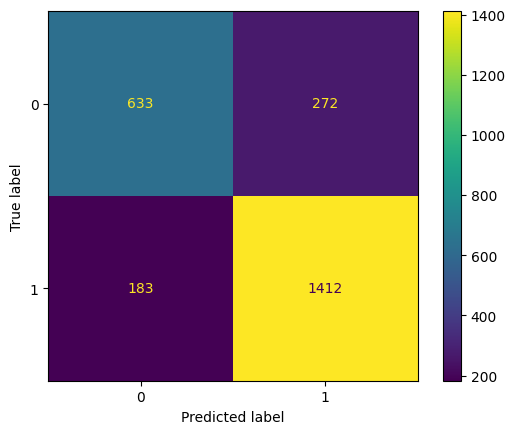

In [111]:
#confusion matrix for SVM linear
print(" Report for Linear %s:\n%s\n"
      % (linearSVM, metrics.classification_report(y_test, presiid)))

cofmat=confusion_matrix(y_true= y_test, y_pred=presiid)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

# ***SVM - Polynomial***

In [130]:
#SVM using pol

poly=SVC(kernel='poly',C=2)
poly.fit(x_train_sc,y_train)
poly_score=poly.score(x_test_sc,y_test)
predic_poly=poly.predict(x_test_sc)
print("The Accuray of SVM using Polynomial : ", poly_score)


The Accuray of SVM using Polynomial :  0.8904


In [113]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for SVM polynomial: %.3f' %precision_score(y_true=y_test,y_pred=predic_poly))
print('Recall score for SVM polynomial : %.3f' %recall_score(y_true=y_test,y_pred=predic_poly))
print('F1 Score for SVM polynomial   : %.3f' %f1_score(y_true=y_test,y_pred=predic_poly))
f1_4=(f1_score(y_true=y_test,y_pred=predic_poly)).round(3)

Precision score for SVM polynomial: 0.870
Recall score for SVM polynomial : 0.974
F1 Score for SVM polynomial   : 0.919


 Report for Polynomial SVC(C=2, kernel='poly'):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       905
           1       0.87      0.97      0.92      1595

    accuracy                           0.89      2500
   macro avg       0.91      0.86      0.87      2500
weighted avg       0.90      0.89      0.89      2500




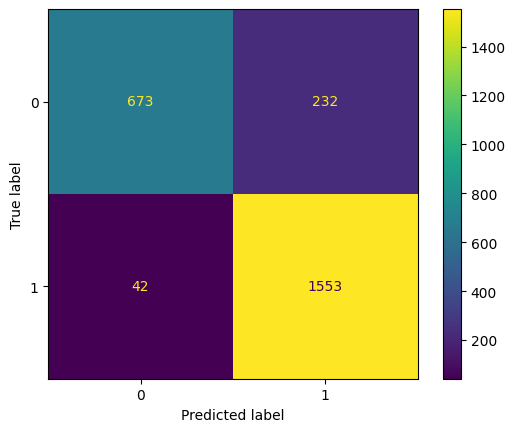

In [114]:
#Confusion Matrix for Poly kernel

#confusion matrix
print(" Report for Polynomial %s:\n%s\n"
      % (poly, metrics.classification_report(y_test, predic_poly)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_poly)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()



# ***Decision Trees***

In [134]:
#Decision tree without fixing max_depth where there might be a higher chance of overfitting
from sklearn.tree import DecisionTreeClassifier

dt_class=DecisionTreeClassifier()
dt_class.fit(x_train,y_train)
predic_dt=dt_class.predict(x_test)
dt_score=dt_class.score(x_test,y_test)
print("The accuray of decision tree without fixing max_depth : ",dt_score)
print("Predicted Values : ",predic_dt)

The accuray of decision tree without fixing max_depth :  0.8516
Predicted Values :  [1. 1. 1. ... 1. 1. 1.]


In [116]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Decision Tree : %.3f' %precision_score(y_true=y_test,y_pred=predic_dt))
print('Recall score for Decision Tree : %.3f' %recall_score(y_true=y_test,y_pred=predic_dt))
print('F1 Score for Decision Tree : %.3f' %f1_score(y_true=y_test,y_pred=predic_dt))
f1_5=(f1_score(y_true=y_test,y_pred=predic_dt)).round(3)


Precision score for Decision Tree : 0.879
Recall score for Decision Tree : 0.882
F1 Score for Decision Tree : 0.881


 Report for  DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       905
           1       0.88      0.88      0.88      1595

    accuracy                           0.85      2500
   macro avg       0.84      0.83      0.83      2500
weighted avg       0.85      0.85      0.85      2500




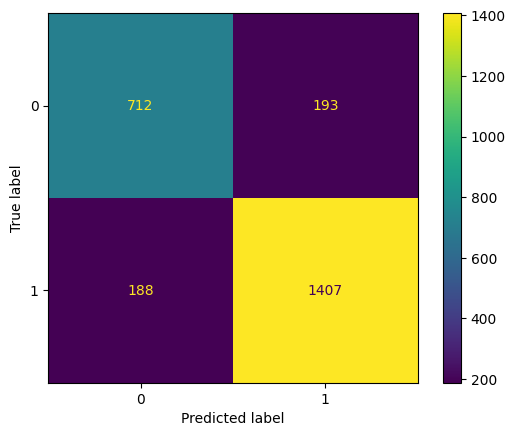

In [117]:
#confusion for decision tree
print(" Report for  %s:\n%s\n"
      % (dt_class, metrics.classification_report(y_test, predic_dt)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_dt)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

#***Random Forest***

In [118]:
#Random Forest without fixing max_depth
from sklearn.ensemble import RandomForestClassifier

rf_class=RandomForestClassifier()
rf_class.fit(x_train,y_train)
predic_rf=rf_class.predict(x_test)
rf_accu=rf_class.score(x_test,y_test)
print("The accuray of Random forest without fixing max_depth: ",rf_accu)
print("predicted values : ", predic_rf)


The accuray of Random forest without fixing max_depth:  0.9268
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [119]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Random forest : %.3f' %precision_score(y_true=y_test,y_pred=predic_rf))
print('Recall score for Random forest : %.3f' %recall_score(y_true=y_test,y_pred=predic_rf))
print('F1 Score for Random forest : %.3f' %f1_score(y_true=y_test,y_pred=predic_rf))
f1_6=(f1_score(y_true=y_test,y_pred=predic_rf)).round(3)

Precision score for Random forest : 0.929
Recall score for Random forest : 0.958
F1 Score for Random forest : 0.944


 Report for  RandomForestClassifier() : 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       905
           1       0.93      0.96      0.94      1595

    accuracy                           0.93      2500
   macro avg       0.93      0.91      0.92      2500
weighted avg       0.93      0.93      0.93      2500




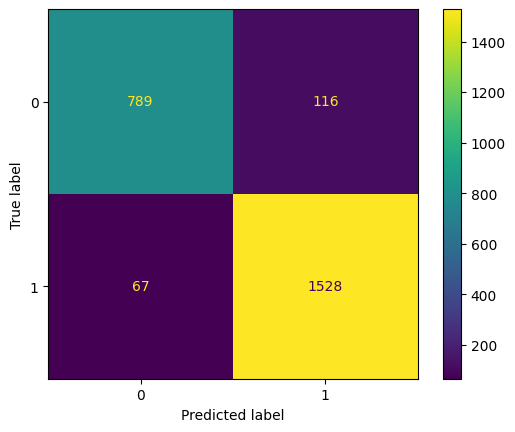

In [120]:
#confusion for Random forest
print(" Report for  %s : \n %s\n"
      % (rf_class, metrics.classification_report(y_test, predic_rf)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_rf)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

#***ADA-Boosting***

In [121]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_class=AdaBoostClassifier(DecisionTreeClassifier())
ada_class.fit(x_train,y_train)
predic_ada=ada_class.predict(x_test)
ada_accu=ada_class.score(x_test,y_test)
print("The Accuray of Ada Boosting without any depth fixed (numb of trees) : ",ada_accu)
print("predicted values : ", predic_ada)

The Accuray of Ada Boosting without any depth fixed (numb of trees) :  0.8512
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [122]:
#precision , recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for ADA-Boost : %.3f' %precision_score(y_true=y_test,y_pred=predic_ada))
print('Recall score for ADA-Boost : %.3f' %recall_score(y_true=y_test,y_pred=predic_ada))
print('F1 Score for ADA-Boost : %.3f' %f1_score(y_true=y_test,y_pred=predic_ada))
f1_7=(f1_score(y_true=y_test,y_pred=predic_ada)).round(3)

Precision score for ADA-Boost : 0.891
Recall score for ADA-Boost : 0.874
F1 Score for ADA-Boost : 0.882


 Report for  AdaBoostClassifier(estimator=DecisionTreeClassifier()):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       905
           1       0.89      0.87      0.88      1595

    accuracy                           0.85      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.85      0.85      0.85      2500




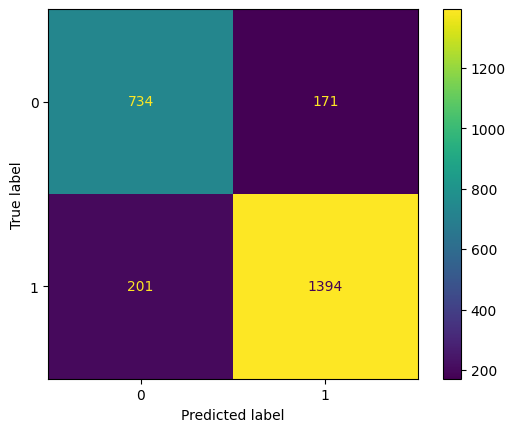

In [123]:
#confusion for Ada-Boosting
print(" Report for  %s:\n%s\n"
      % (ada_class, metrics.classification_report(y_test, predic_ada)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_ada)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

#***Gradient***

In [135]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_class=GradientBoostingClassifier()
gb_class.fit(x_train,y_train)
predic_gb=gb_class.predict(x_test)
gb_accu=gb_class.score(x_test,y_test)
print("The accuray of Gradient boosting without fixing values of max depth (num of trees) : " ,gb_accu)
print("predicted values : " , predic_gb)

The accuray of Gradient boosting without fixing values of max depth (num of trees) :  0.9292
predicted values :  [1. 1. 1. ... 1. 1. 1.]


In [125]:
#precision, recall and F1 score values

from sklearn.metrics import precision_score , recall_score,f1_score

print('Precision score for Gradient  : %.3f' %precision_score(y_true=y_test,y_pred=predic_gb))
print('Recall score for Gradient : %.3f' %recall_score(y_true=y_test,y_pred=predic_gb))
print('F1 Score for Gradient : %.3f' %f1_score(y_true=y_test,y_pred=predic_gb))
f1_8=(f1_score(y_true=y_test,y_pred=predic_gb)).round(3)

Precision score for Gradient  : 0.924
Recall score for Gradient : 0.969
F1 Score for Gradient : 0.946


 Report for  GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       905
           1       0.92      0.97      0.95      1595

    accuracy                           0.93      2500
   macro avg       0.93      0.91      0.92      2500
weighted avg       0.93      0.93      0.93      2500




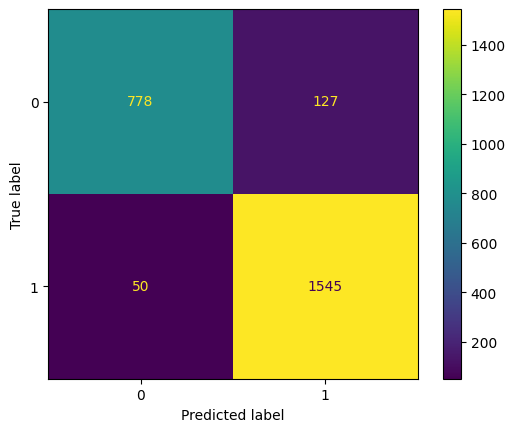

In [126]:
#confusion for Random forest
print(" Report for  %s:\n%s\n"
      % (gb_class, metrics.classification_report(y_test, predic_gb)))

cofmat=confusion_matrix(y_true= y_test, y_pred=predic_gb)
visu=ConfusionMatrixDisplay(confusion_matrix=cofmat)

visu.plot()
plt.show()

#***Results***

In [127]:
from tabulate import tabulate

# Sample data (replace with your actual F1 scores)
model =["Logistic Regression", "SVM rbf", "SVM linear", "SVM polynomial ", "Decision tree","Random forest","Ada-boost","Gradient Boost"]

f1valu = [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7,f1_8]

# Create a dictionary for the data
data = {"Model Used": model, "F1 Score": f1valu}

# Print the table with formatting using tabulate library
print(tabulate(data, headers="keys", tablefmt="fancy_grid"))


╒═════════════════════╤════════════╕
│ Model Used          │   F1 Score │
╞═════════════════════╪════════════╡
│ Logistic Regression │      0.86  │
├─────────────────────┼────────────┤
│ SVM rbf             │      0.966 │
├─────────────────────┼────────────┤
│ SVM linear          │      0.861 │
├─────────────────────┼────────────┤
│ SVM polynomial      │      0.919 │
├─────────────────────┼────────────┤
│ Decision tree       │      0.881 │
├─────────────────────┼────────────┤
│ Random forest       │      0.944 │
├─────────────────────┼────────────┤
│ Ada-boost           │      0.882 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      0.946 │
╘═════════════════════╧════════════╛


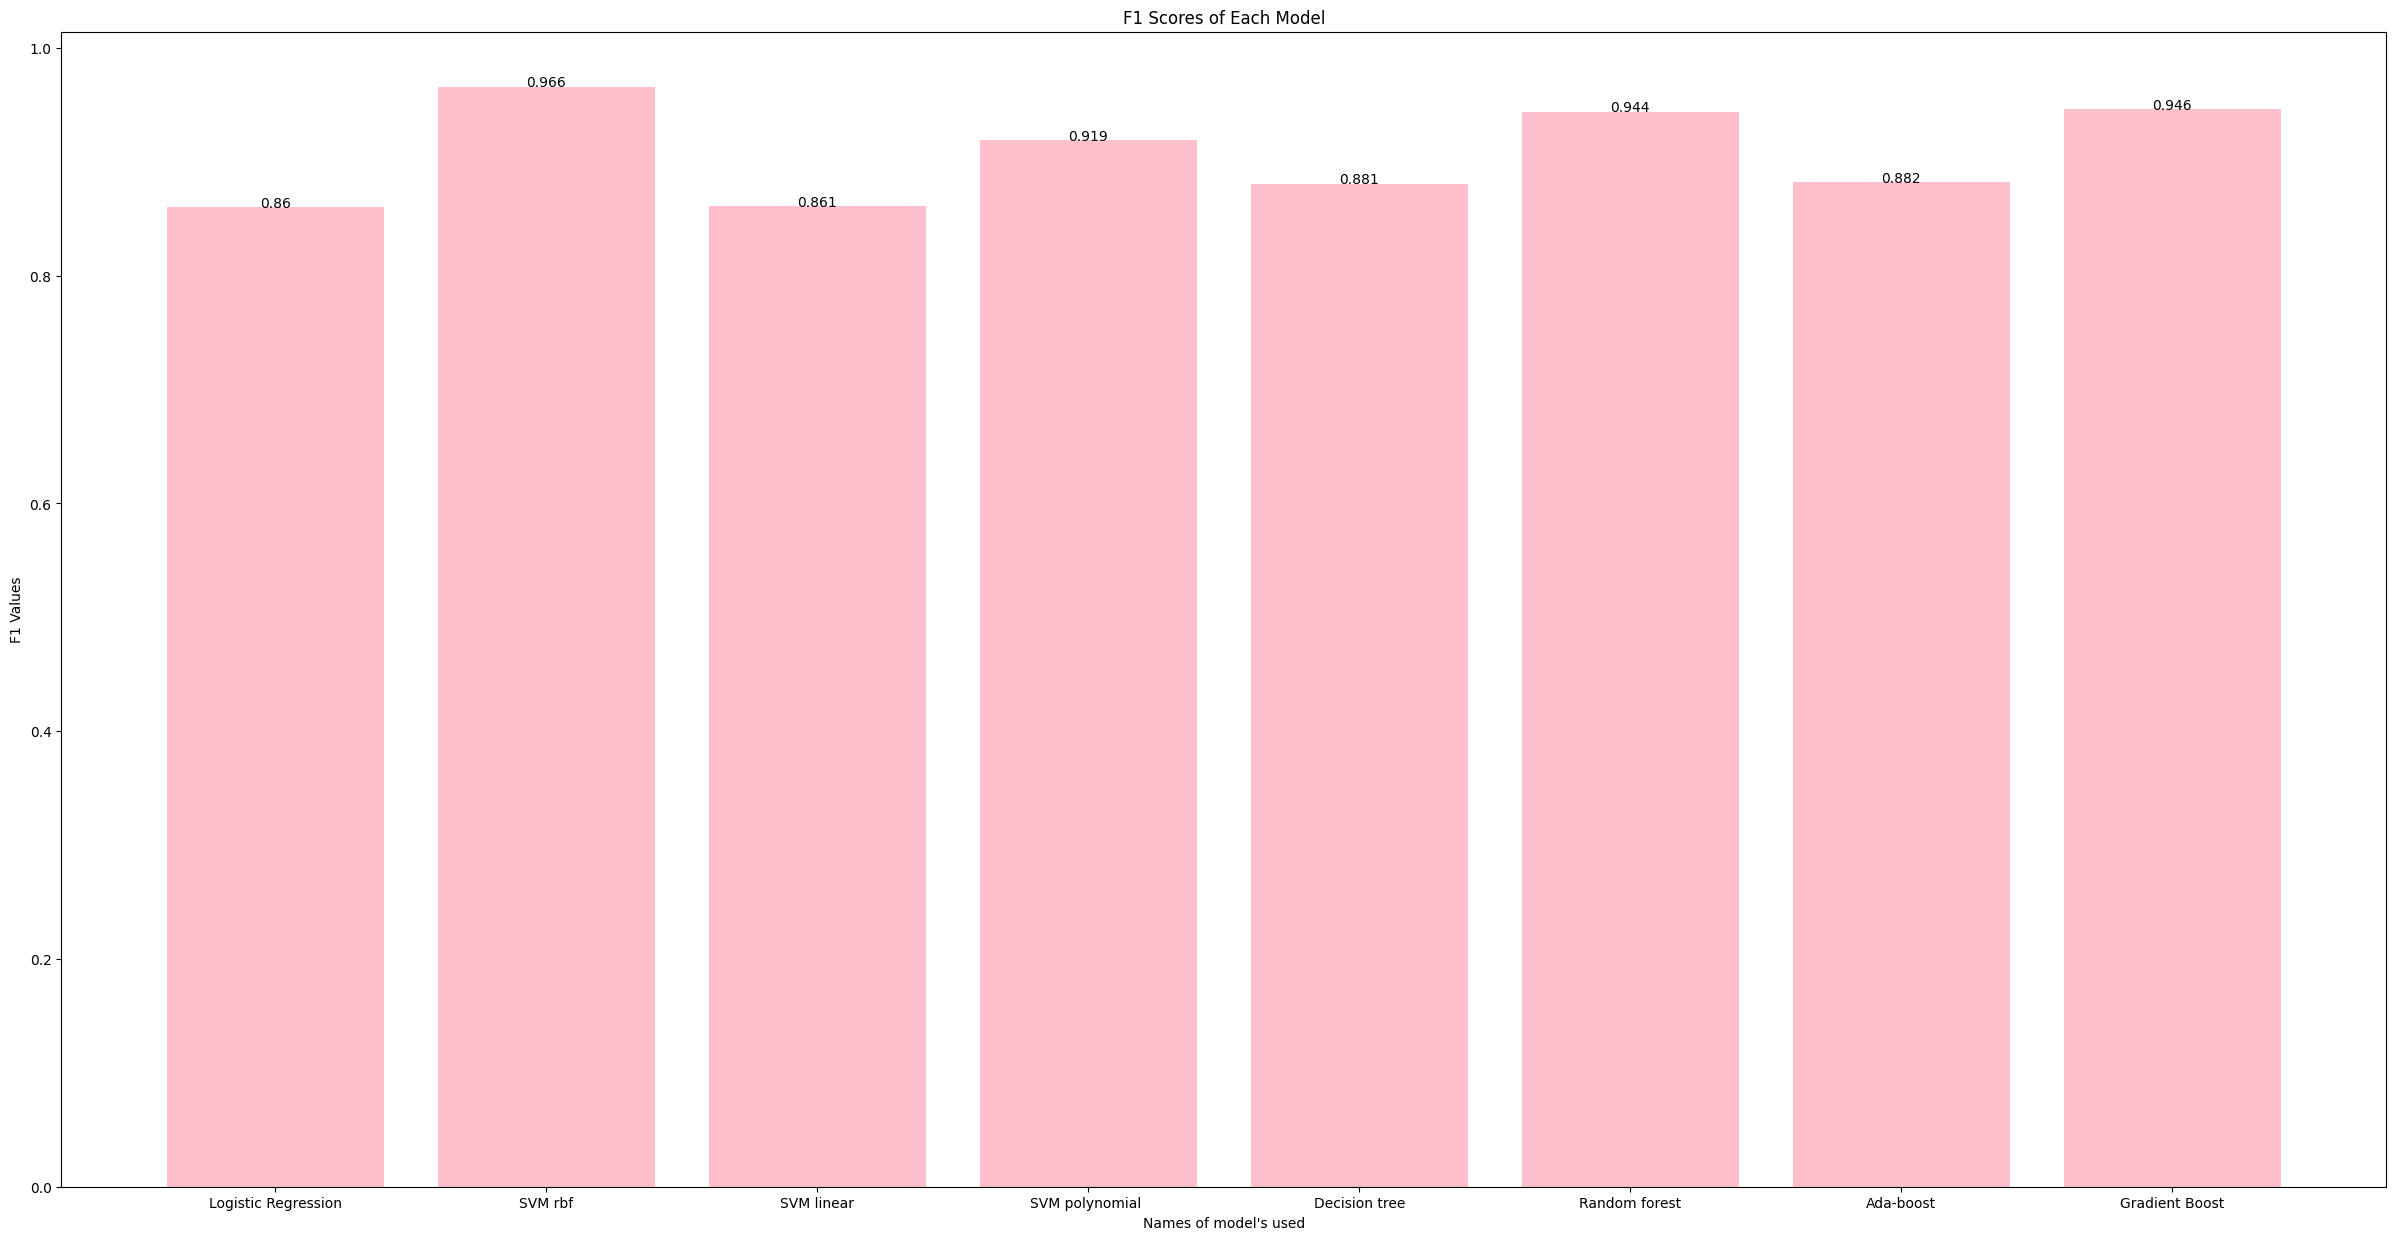

In [128]:
y_value = [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7,f1_8]
x_value = ["Logistic Regression", "SVM rbf", "SVM linear", "SVM polynomial ", "Decision tree","Random forest","Ada-boost","Gradient Boost"]


plt.figure(figsize=(30,15))

bars = plt.bar(x_value, y_value,color='pink')
value_model=0
for bar , yx in zip(bars,y_value):
  plt.text(value_model,yx , round (yx,3), ha='center')
  value_model +=1


plt.plot()
plt.ylabel("F1 Values")
plt.xlabel("Names of model's used")
plt.title("F1 Scores of Each Model")
plt.show()
